# ENGG6500 Intro to Machine Learning 
# Air Quality Index Prediction

# Setting up the Environment

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
working_directory=os.getcwd()
print(working_directory)

/Users/yochitharishitha/Downloads


# Load the Dataset

In [2]:
# ENGG6500 Intro to Machine Learning Assignment 1#Load the dataset
path=working_directory + '/AQI_Dataset.xlsx'
#Read the csv file as dataframe
aqi_df = pd.read_excel('AQI_Dataset.xlsx')

In [3]:
aqi_df.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,AQI
0,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:45:00+00:00,2019-01-03T22:15:00+05:30,so2,98.33,µg/m³,23.002657,72.591912,106.738027
1,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:45:00+00:00,2019-01-03T22:15:00+05:30,o3,0.00,µg/m³,23.002657,72.591912,0.000000
2,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:45:00+00:00,2019-01-03T22:15:00+05:30,pm25,224.39,µg/m³,23.002657,72.591912,380.345814
3,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:45:00+00:00,2019-01-03T22:15:00+05:30,co,390.00,µg/m³,23.002657,72.591912,19.500000
4,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:30:00+00:00,2019-01-03T22:00:00+05:30,pm25,165.91,µg/m³,23.002657,72.591912,335.465814


In [4]:
#Number of rows and columns 
aqi_df.shape

(14123, 12)

# Data Statistics

In [5]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  14123 non-null  int64  
 1   location    14123 non-null  object 
 2   city        14123 non-null  object 
 3   country     14123 non-null  object 
 4   utc         14123 non-null  object 
 5   local       14123 non-null  object 
 6   parameter   14123 non-null  object 
 7   value       14123 non-null  float64
 8   unit        14123 non-null  object 
 9   latitude    14123 non-null  float64
 10  longitude   14123 non-null  float64
 11  AQI         14122 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
aqi_df.describe()

,locationId,value,latitude,longitude,AQI
count,14123.000000,14123.000000,14123.000000,14123.000000,14122.000000
mean,7450.403668,423.680729,27.020523,77.383261,107.806376
std,1701.720642,857.314204,4.711389,0.842208,255.661412
min,2586.000000,-999.000000,12.909916,72.591912,-1665.000000
25%,5634.000000,24.800000,28.551201,77.131023,27.500000
50%,6957.000000,101.000000,28.631694,77.201157,55.855856
75%,8558.000000,446.645000,28.684678,77.264840,150.475000
max,10831.000000,9150.000000,28.822836,80.518167,500.000000


# Data Description

- locationId:Location ID where data was measured.
- location:Location where data was measured.
- country:Country containing location.
- utc:universal time
- local:local time
- parameter:Name of the Pollutant being measured. Allowed values: PM25, PM10, SO2, NO2, O3, CO
- value:measured value for the pollutant
- unit:the measurement unit
- latitude:Latitude in decimal degrees.
- longitude:Longitude in decimal degrees. 
- AQI: Air Quality Index      

# Data Visualisation

In [7]:
#splitting the dataset into datasets for individual gases for better understanding of the 
#relationships between AQI and different gases
co = aqi_df[aqi_df['parameter']=='co']
no2 = aqi_df[aqi_df['parameter']=='no2']
o3 = aqi_df[aqi_df['parameter']=='o3']
pm10 = aqi_df[aqi_df['parameter']=='pm10']
pm25 = aqi_df[aqi_df['parameter']=='pm25']
so2 = aqi_df[aqi_df['parameter']=='so2']

In [8]:
so2.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,AQI
0,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:45:00+00:00,2019-01-03T22:15:00+05:30,so2,98.33,µg/m³,23.002657,72.591912,106.738027
6,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:30:00+00:00,2019-01-03T22:00:00+05:30,so2,92.51,µg/m³,23.002657,72.591912,104.811003
10,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:15:00+00:00,2019-01-03T21:45:00+05:30,so2,94.19,µg/m³,23.002657,72.591912,105.367258
13,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T16:00:00+00:00,2019-01-03T21:30:00+05:30,so2,91.05,µg/m³,23.002657,72.591912,104.327592
22,5631,"Maninagar, Ahmedabad - GPCB",Ahmedabad,IN,2019-01-03T15:45:00+00:00,2019-01-03T21:15:00+05:30,so2,86.01,µg/m³,23.002657,72.591912,102.658829


# Plotting graphs of gas density vs. AQI

# Scatter plots

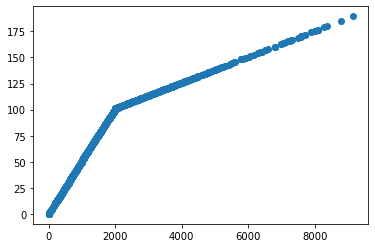

In [9]:
plt.scatter(co['value'], co['AQI'])

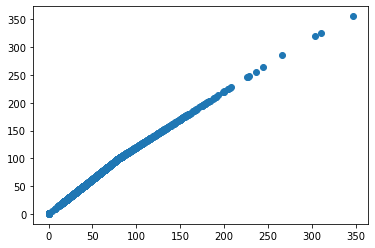

In [10]:
plt.scatter(no2['value'], no2['AQI'])

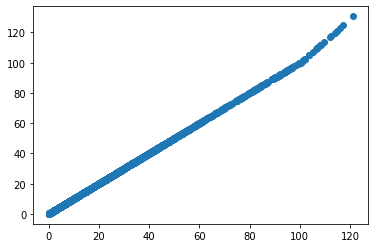

In [11]:
plt.scatter(o3['value'], o3['AQI'])

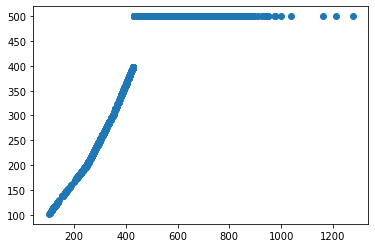

In [12]:
plt.scatter(pm10['value'], pm10['AQI'])

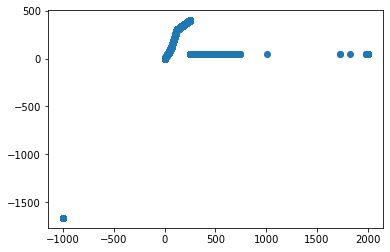

In [13]:
plt.scatter(pm25['value'], pm25['AQI'])

OBSERVATION : The above graph shows the distortions of pm25 gas density with AQI. It seems the values of pm25 gases are quite unstable and would require cleaning.

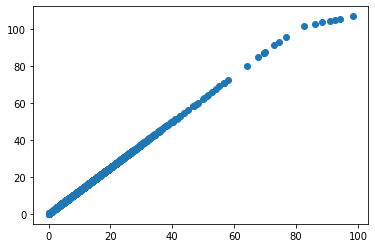

In [14]:
plt.scatter(so2['value'], so2['AQI'])

# Boxplots

Checking for outliers

<AxesSubplot:xlabel='AQI', ylabel='parameter'>

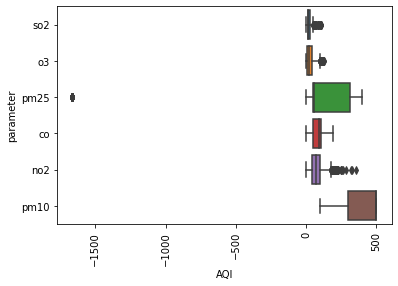

In [15]:
plt.xticks(rotation=90)
sns.boxplot(x='AQI',y='parameter',data=aqi_df)

# Histogram

Text(0.5, 1.0, 'AQI vs parameter')

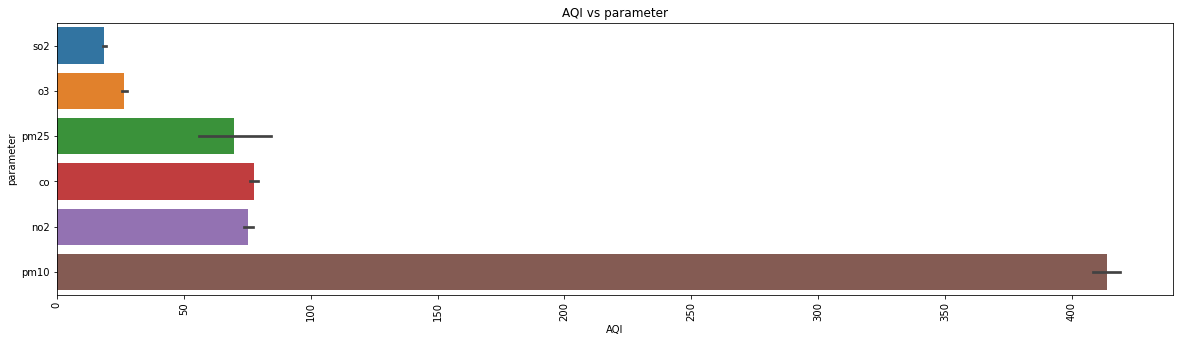

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x = "AQI", y = aqi_df['parameter'], data = aqi_df)
plt.xticks(rotation=90)
plt.title("AQI vs parameter")

# Pairplots

<Figure size 1440x1440 with 0 Axes>

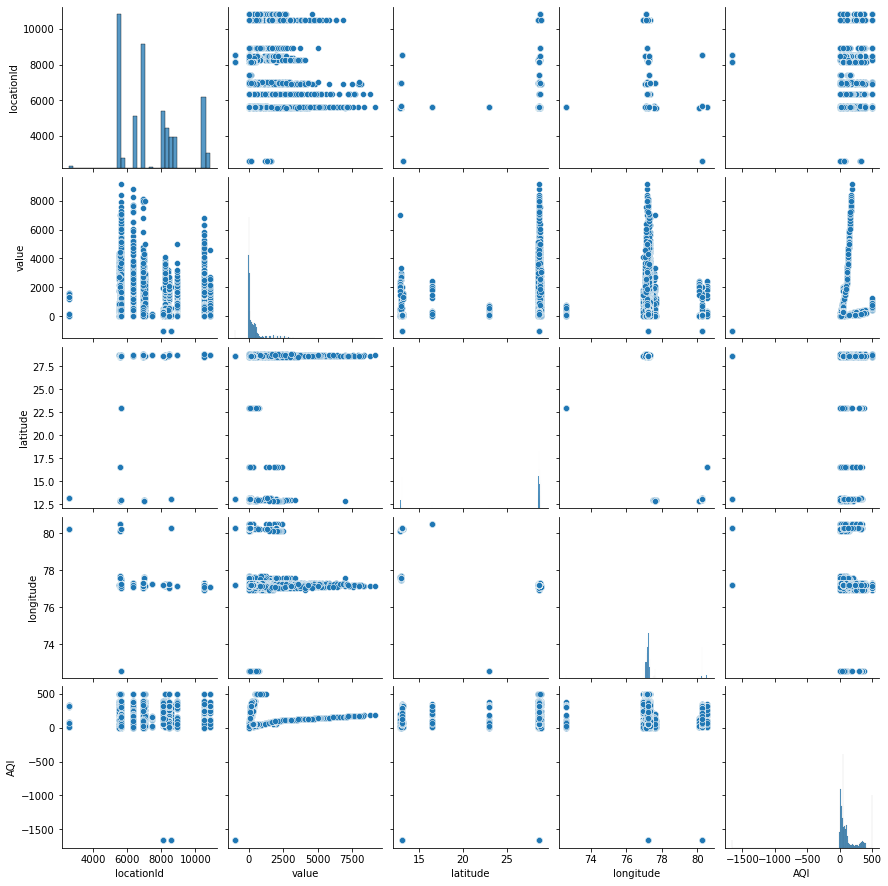

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(aqi_df)

# Heatmap

<AxesSubplot:>

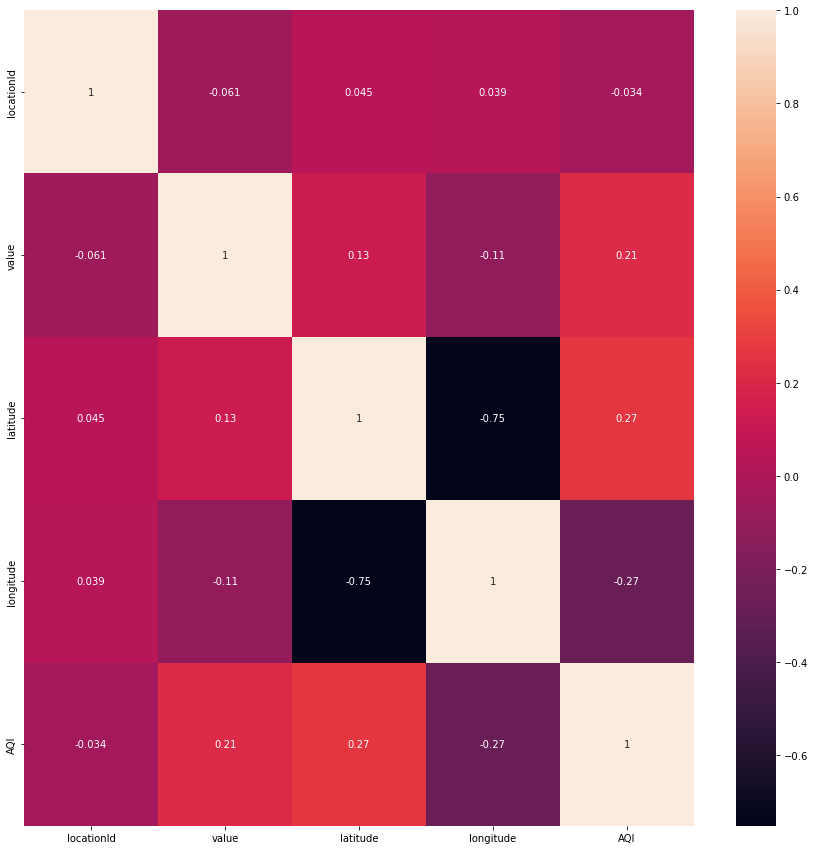

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(aqi_df.corr(),annot=True)

# Data Cleaning

Checking for null values

In [19]:
aqi_df.isnull().sum()

locationId    0
location      0
city          0
country       0
utc           0
local         0
parameter     0
value         0
unit          0
latitude      0
longitude     0
AQI           1
dtype: int64

In [20]:
aqi_df['location'].value_counts()

US Diplomatic Post: Chennai                         743
US Diplomatic Post: New Delhi                       741
Sirifort, Delhi - CPCB                              421
ITO, Delhi - CPCB                                   411
DTU, Delhi - CPCB                                   407
Dwarka-Sector 8, Delhi - DPCC                       390
Okhla Phase-2, Delhi - DPCC                         389
Major Dhyan Chand National Stadium, Delhi - DPCC    388
R K Puram, Delhi - DPCC                             388
Jawaharlal Nehru Stadium, Delhi - DPCC              385
Ashok Vihar, Delhi - DPCC                           383
Najafgarh, Delhi - DPCC                             380
Rohini, Delhi - DPCC                                375
Punjabi Bagh, Delhi - DPCC                          372
Wazirpur, Delhi - DPCC                              365
Narela, Delhi - DPCC                                364
Sri Aurobindo Marg, Delhi - DPCC                    355
Mandir Marg, Delhi - DPCC                       

In [21]:
aqi_df['city'].value_counts()

Delhi        12606
Chennai        887
Bengaluru      506
Amaravati       63
Ahmedabad       61
Name: city, dtype: int64

In [22]:
aqi_df['country'].value_counts()

IN    14123
Name: country, dtype: int64

In [23]:
aqi_df['parameter'].value_counts()

pm25    3718
no2     2269
o3      2153
co      2109
pm10    2020
so2     1854
Name: parameter, dtype: int64

In [24]:
aqi_df['value'].value_counts()

-999.00     187
 2000.00     83
 1800.00     63
 0.00        60
 2200.00     59
           ... 
 38.74        1
 210.13       1
 1160.00      1
 71.28        1
 391.00       1
Name: value, Length: 4202, dtype: int64

In [25]:
aqi_df['AQI'].value_counts()

 50.000000      1484
 500.000000     1274
-1665.000000     187
 50.000000        97
 90.190190        63
                ... 
 63.100000         1
 44.700000         1
 11.212500         1
 66.240256         1
 100.500000        1
Name: AQI, Length: 4016, dtype: int64

OBSERVATION: There are few rows which has values like -999 for pm25 parameter.

Removing error values 

In [26]:
#drop any rows that have -999 in the value column
aqi_df = aqi_df[aqi_df.value != -999]

Replacing null values with mean 

In [27]:
aqi_df['AQI']=aqi_df['AQI'].fillna(aqi_df['AQI'].mean())

Deleting unnecessary columns

In [28]:
del aqi_df['country']
del aqi_df['unit']
del aqi_df['utc']
del aqi_df['local']

Number of rows and columns left after data cleaning

In [29]:
aqi_df.shape

(13936, 8)

# Data Preprocessing

Converting Categorical data to numerical data

In [30]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13936 entries, 0 to 14122
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  13936 non-null  int64  
 1   location    13936 non-null  object 
 2   city        13936 non-null  object 
 3   parameter   13936 non-null  object 
 4   value       13936 non-null  float64
 5   latitude    13936 non-null  float64
 6   longitude   13936 non-null  float64
 7   AQI         13936 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 979.9+ KB


In [31]:
#applying label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
aqi_df['location'] = le.fit_transform(aqi_df['location'])
aqi_df['city']=le.fit_transform(aqi_df['city'])
aqi_df['parameter']=le.fit_transform(aqi_df['parameter'])

<AxesSubplot:>

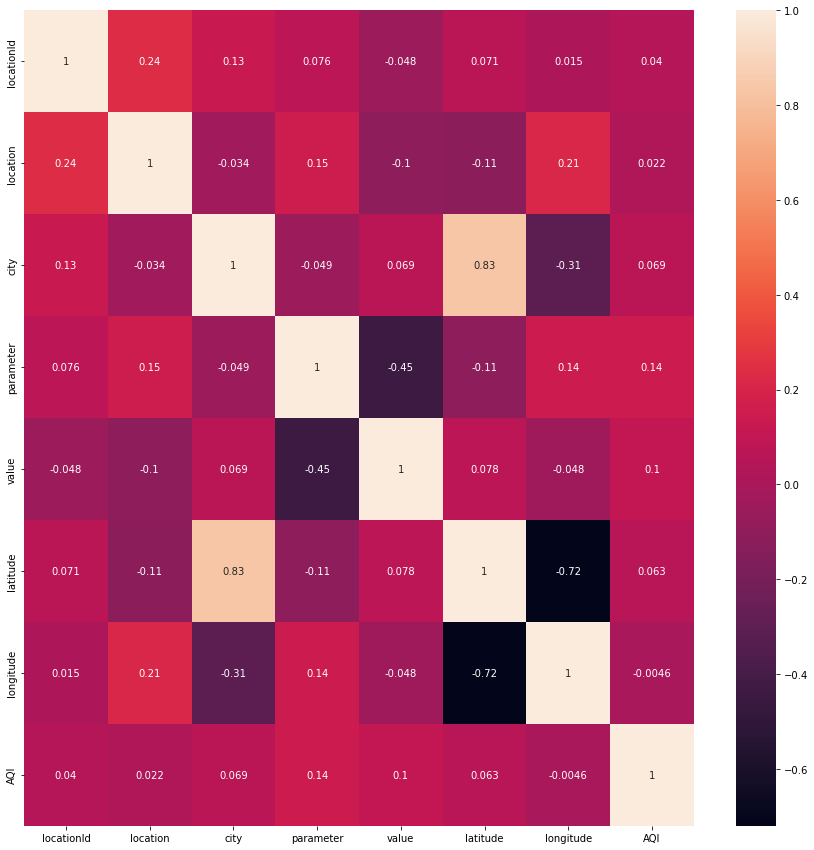

In [32]:
#Heatmap after data cleaning
plt.figure(figsize=(15,15))
sns.heatmap(aqi_df.corr(),annot=True)

In [33]:
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
S_scaler = MinMaxScaler()
aqi_df_scaled = S_scaler.fit_transform(aqi_df)
aqi_scaled_df = pd.DataFrame(aqi_df_scaled, columns = aqi_df.columns)

In [34]:
 #save class labels separately
class_labels = aqi_scaled_df['AQI'].values 
#check class imbalance and then adjust the split
aqi_scaled_df['AQI'].value_counts() 
# drop the label from dataframe so it is not used in training
aqi_scaled_df.drop(['AQI'], axis=1, inplace=True)

In [35]:
#Splitting the dataset into 80:20 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    aqi_scaled_df, class_labels, test_size=0.2, random_state=42)
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (11148, 7), (11148,)
Test Data: (2788, 7), (2788,)


# Regression Models

In [36]:
R2_score = []
reg_model = []

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import math
#Training the model
Linear_R=LinearRegression().fit(x_train, y_train)
LinearR_trained = Linear_R.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, LinearR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, LinearR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, LinearR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, LinearR_trained)))

#Testing the model
LinearR_test = Linear_R.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, LinearR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, LinearR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, LinearR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test, LinearR_test)))

R2_score.append(r2_score(y_test, LinearR_test))
reg_model.append("Linear Regression")

Training evaluation
R2 score: 0.06
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30

Test set evaluation
R2 score: 0.07
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30


# Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

rr = Ridge()
#Training the model
rr.fit(x_train, y_train) 
rr_trained = rr.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, rr_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, rr_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, rr_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, rr_trained)))

#testing the model
rr_test = rr.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, rr_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rr_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, rr_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test, rr_test)))

R2_score.append(r2_score(y_test, rr_test))
reg_model.append("Ridge Regression")

Training evaluation
R2 score: 0.06
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30

Test set evaluation
R2 score: 0.07
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30


# Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0)
#Training the model
model_lasso.fit(x_train, y_train) 
lasso_trained= model_lasso.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, lasso_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, lasso_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, lasso_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, lasso_trained)))

#Testing the model
lasso_test = model_lasso.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, lasso_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, lasso_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, lasso_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test, lasso_test)))

R2_score.append(r2_score(y_test, lasso_test))
reg_model.append("Lasso Regression")

Training evaluation
R2 score: 0.06
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30

Test set evaluation
R2 score: 0.07
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30


# Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor 

DT_model = DecisionTreeRegressor(max_depth=4) 
  
#Training the model
DT_model.fit(x_train, y_train)
DT_trained = DT_model.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, DT_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, DT_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, DT_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, DT_trained)))

#Testing the model
DT_test = DT_model.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, DT_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, DT_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, DT_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test, DT_test)))

R2_score.append(r2_score(y_test, DT_test))
reg_model.append("Decision Tree Regression")

Training evaluation
R2 score: 0.98
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.05

Test set evaluation
R2 score: 0.97
Mean absolute error: 0.03
Mean squared error: 0.00
Root Mean squared error: 0.05


# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(max_depth=4).fit(x_train,y_train)

#training the model
RF_trained=RF.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, RF_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, RF_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, RF_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, RF_trained)))

#testing the model
RF_test=RF.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, RF_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, RF_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, RF_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test, RF_test)))

R2_score.append(r2_score(y_test, RF_test))
reg_model.append("Random Forest Regression")

Training evaluation
R2 score: 0.98
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.05

Test set evaluation
R2 score: 0.98
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.05


# Support Vector Regression

In [42]:
from sklearn.svm import SVR

regressor = SVR() 
  
#Training the model
regressor.fit(x_train,y_train)
SVR_trained = regressor.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, SVR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, SVR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, SVR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, SVR_trained)))

#Testing the model
SVR_test = regressor.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, SVR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, SVR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, SVR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,SVR_test)))

R2_score.append(r2_score(y_test, SVR_test))
reg_model.append("Support Vector Regression")

Training evaluation
R2 score: 0.60
Mean absolute error: 0.14
Mean squared error: 0.04
Root Mean squared error: 0.19

Test set evaluation
R2 score: 0.62
Mean absolute error: 0.14
Mean squared error: 0.04
Root Mean squared error: 0.19


# AdaBoost Regression

In [43]:
from sklearn.ensemble import AdaBoostRegressor

regr =AdaBoostRegressor()
  
#Training the model
regr.fit(x_train,y_train)
ABR_trained = regr.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, ABR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, ABR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, ABR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, ABR_trained)))

#Testing the model
ABR_test = regr.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test, ABR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, ABR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, ABR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,ABR_test)))

R2_score.append(r2_score(y_test, ABR_test))
reg_model.append("Adaptive Boosting Regression")

Training evaluation
R2 score: 0.83
Mean absolute error: 0.08
Mean squared error: 0.02
Root Mean squared error: 0.12

Test set evaluation
R2 score: 0.84
Mean absolute error: 0.08
Mean squared error: 0.02
Root Mean squared error: 0.12


# Stacking Regression

In [44]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]

STR_model =StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
  
#Training the model
STR_model.fit(x_train,y_train)
STR_trained = STR_model.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, STR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, STR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, STR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,STR_trained)))

#Testing the model
STR_test =STR_model.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,STR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, STR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, STR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,STR_test)))

R2_score.append(r2_score(y_test, STR_test))
reg_model.append("Stacking ensemble")

Training evaluation
R2 score: 0.78
Mean absolute error: 0.08
Mean squared error: 0.02
Root Mean squared error: 0.14

Test set evaluation
R2 score: 0.81
Mean absolute error: 0.08
Mean squared error: 0.02
Root Mean squared error: 0.14


<AxesSubplot:title={'center':'R2 score Comparison'}, xlabel='R2 score', ylabel='Algorithm'>

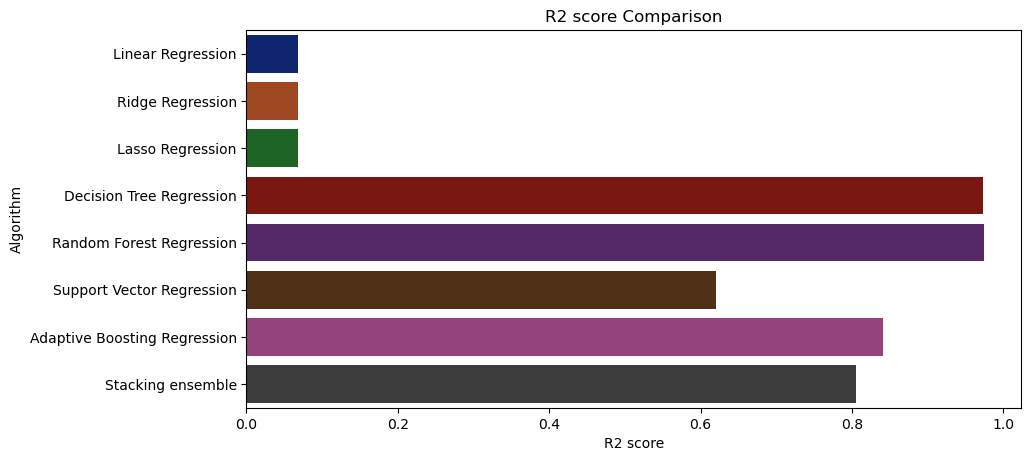

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('R2 score Comparison')
plt.xlabel('R2 score')
plt.ylabel('Algorithm')
sns.barplot(x = R2_score,y =reg_model,palette='dark')

# Hyperparameter Tuning

In [46]:
#for Comparing models after hyperparameter tuning
hp_R2_score=[]
hp_reg_model=[]

# Ridge Regression

In [47]:
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
#parameter tuning
model1 = RidgeCV(alphas=arange(0.1, 1.0, 0.02), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model1.fit(x_train,y_train)
# best alpha value
print('alpha: %f' % model1.alpha_)

alpha: 0.980000


In [48]:
hp_rr = Ridge(alpha=10)
#Training the model
hp_rr.fit(x_train, y_train) 
hp_rr_trained = hp_rr.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, hp_rr_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train,hp_rr_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train,hp_rr_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,hp_rr_trained)))

#testing the model
hp_rr_test = hp_rr.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_rr_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_rr_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test,hp_rr_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_rr_test)))

hp_R2_score.append(r2_score(y_test, hp_rr_test))
hp_reg_model.append("Ridge Regression")

Training evaluation
R2 score: 0.06
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30

Test set evaluation
R2 score: 0.07
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30


# Lasso Regression

In [49]:
from sklearn.model_selection import GridSearchCV
import numpy as np

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001])
model2 = Lasso()
#parameter tuning using gridsearch 
grid = GridSearchCV(estimator=model2, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)
#best alpha value
print(grid.best_estimator_.alpha)
print(grid.best_score_)

0.0001
0.05897798764929703


In [50]:
hp_model_lasso = Lasso(alpha=0.0001)
#Training the model
hp_model_lasso.fit(x_train, y_train) 
hp_lasso_trained= hp_model_lasso.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, hp_lasso_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, hp_lasso_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train,hp_lasso_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train, hp_lasso_trained)))

#Testing the model
hp_lasso_test = hp_model_lasso.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_lasso_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_lasso_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test,hp_lasso_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_lasso_test)))

hp_R2_score.append(r2_score(y_test, hp_lasso_test))
hp_reg_model.append("Lasso Regression")

Training evaluation
R2 score: 0.06
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30

Test set evaluation
R2 score: 0.07
Mean absolute error: 0.23
Mean squared error: 0.09
Root Mean squared error: 0.30


# Decision Tree Regression

In [51]:
from sklearn.model_selection import GridSearchCV
#parameter tuning using gridsearch
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,3,5,7,9],
           "max_features":["log2","sqrt"],
           "max_leaf_nodes":[10,30,50,70] }

tuning_model=GridSearchCV(DT_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)
#best parameters
tuning_model.best_params_

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.064 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-0.092 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-0.094 total time=   0.0s
[CV 2/

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.064 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.075 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.063 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.062 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-0.077 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-0.092 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_sa

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-0.062 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.077 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.075 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=70, min_sa

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=-0.089 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=-0.080 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.074 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.047 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_sa

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.079 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.075 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.087 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.037 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.054 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-0.073 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-0.083 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.080 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.080 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.052 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.053 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.048 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.089 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-0.021 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.027 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.086 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.047 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.032 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.056 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.049 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_sa

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.050 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.040 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.020 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.044 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.088 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.082 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.019 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.057 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=random;, score=-0.091 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=random;, score=-0.068 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, splitter=best;, score=-0.041 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_sa

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=-0.018 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=-0.048 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=-0.033 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=-0.033 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=-0.036 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-0.066 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-0.032 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=70, min_sa

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=-0.087 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.011 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.013 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.011 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.048 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-0.003 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-0.028 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-0.014 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-0.056 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-0.082 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-0.004 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-0.011 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=70, min_sa

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=-0.089 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=-0.077 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-0.016 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-0.019 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-0.007 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-0.014 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.062 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.075 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.025 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.011 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.007 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.036 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=70, min_sa

[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-0.035 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-0.038 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.064 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.089 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.029 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.016 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.020 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=50, min_sa

[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-0.050 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-0.050 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.034 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.088 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-0.073 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.039 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.058 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_sa

[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-0.011 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.033 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.041 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-0.076 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=-0.036 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=-0.029 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=-0.019 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=50, min_sa

[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.005 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.032 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-0.032 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.086 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.079 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-0.082 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=

[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-0.008 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.035 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-0.034 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.024 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.013 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=-0.014 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=70

[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-0.022 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.009 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.007 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-0.016 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.079 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.027 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-0.022 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-0.021 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=-0.062 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=-0.086 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=-0.067 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.052 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.047 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=-0.022 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-0.025 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-0.035 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-0.083 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-0.028 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-0.015 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-0.022 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-0.025 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=-0.033 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=-0.026 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.016 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.032 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=-0.014 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, splitter=random;, score=-0.077 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, splitter=random;, score=-0.078 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=-0.004 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=-0.004 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=-0.015 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.020 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.054 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=-0.057 total time=   0.0s


{'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [52]:
hp_DT_model = DecisionTreeRegressor(max_depth=12,
 max_features='sqrt',
 max_leaf_nodes= 70,
 min_samples_leaf= 7,
 splitter= 'best') 
  
#Training the model
hp_DT_model.fit(x_train, y_train)
hp_DT_trained = hp_DT_model.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, hp_DT_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train,hp_DT_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, hp_DT_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,hp_DT_trained)))

#Testing the model
hp_DT_test = hp_DT_model.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_DT_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_DT_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test,hp_DT_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_DT_test)))

hp_R2_score.append(r2_score(y_test, hp_DT_test))
hp_reg_model.append("Decision Tree Regression")

Training evaluation
R2 score: 0.99
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.03

Test set evaluation
R2 score: 0.99
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.03


# Random Forest Regression

In [53]:
from sklearn.model_selection import RandomizedSearchCV
#parameters
random_grid={'bootstrap': [True, False],
 'max_depth': [1,3,5,7,9,11],
 'max_features': ['sqrt','log2'],
 'n_estimators': [200, 400, 600]}
#parameter tuning using Random search grid
rf_random = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,
             cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train,y_train)
#best parameters
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 600,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

In [54]:
hp_RF=RandomForestRegressor(n_estimators=600,
 max_features='sqrt',
 max_depth= 11,
 bootstrap=False).fit(x_train,y_train)

#training the model
hp_RF_trained=hp_RF.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train,hp_RF_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train,hp_RF_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train,hp_RF_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,hp_RF_trained)))

#testing the model
hp_RF_test=hp_RF.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_RF_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_RF_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test,hp_RF_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_RF_test)))

hp_R2_score.append(r2_score(y_test, hp_RF_test))
hp_reg_model.append("Random Forest Regression")

Training evaluation
R2 score: 0.99
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.03

Test set evaluation
R2 score: 0.99
Mean absolute error: 0.02
Mean squared error: 0.00
Root Mean squared error: 0.04


# Support Vector Regression

In [ ]:
#parameters
param_grid = {'C': [10,50,100], 'gamma': [1,0.1],'kernel': ['rbf', 'poly', 'sigmoid']}
#using random searcg grid
SVR_random = RandomizedSearchCV(estimator = regressor,param_distributions = param_grid,
             cv = 5, verbose=2, random_state=35, n_jobs = -1)
SVR_random.fit(x_train,y_train)
#best parameters
SVR_random.best_params_

In [55]:
hp_regressor = SVR(kernel='rbf',C=100,gamma=1) 
  
#Training the model
hp_regressor.fit(x_train,y_train)
hp_SVR_trained = hp_regressor.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, hp_SVR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, hp_SVR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, hp_SVR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,hp_SVR_trained)))

#Testing the model
hp_SVR_test = hp_regressor.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_SVR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_SVR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, hp_SVR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_SVR_test)))

hp_R2_score.append(r2_score(y_test, hp_SVR_test))
hp_reg_model.append("Support Vector Regression")

Training evaluation
R2 score: 0.83
Mean absolute error: 0.09
Mean squared error: 0.02
Root Mean squared error: 0.13

Test set evaluation
R2 score: 0.85
Mean absolute error: 0.09
Mean squared error: 0.01
Root Mean squared error: 0.12


# Adaptive Boosting

In [56]:
ada=AdaBoostRegressor()
#parameters
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[10,20,42,50]}
#using grid search 
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)
search.fit(x_train,y_train)
#best parameters
search.best_params_

[CV] END bootstrap=False, max_depth=7, max_features=sqrt, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, n_estimators=600; total time=   7.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=9, max_features=log2, n_estimators=400; total time=   3.8s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, n_estimators=600; total time=  13.0s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, n_estimators=600; total time=  13.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=3, max_features=log2, n_estimators=400; total time=   2.0s
[CV] END bootstrap=False, max_depth=9, max_featur

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 50}

In [57]:
hp_regr =AdaBoostRegressor(n_estimators=500,learning_rate=0.1,random_state=50)
  
#Training the model
hp_regr.fit(x_train,y_train)
hp_ABR_trained = hp_regr.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train,hp_ABR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train,hp_ABR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train,hp_ABR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,hp_ABR_trained)))

#Testing the model
hp_ABR_test = hp_regr.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,hp_ABR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test,hp_ABR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test,hp_ABR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,hp_ABR_test)))

hp_R2_score.append(r2_score(y_test, hp_ABR_test))
hp_reg_model.append("Adaptive Boosting Regression")

Training evaluation
R2 score: 0.77
Mean absolute error: 0.10
Mean squared error: 0.02
Root Mean squared error: 0.15

Test set evaluation
R2 score: 0.77
Mean absolute error: 0.10
Mean squared error: 0.02
Root Mean squared error: 0.15


In [58]:
estimators = [('lr', RidgeCV(alphas=10)),('svr', LinearSVR(C=100,random_state=42))]

STR_model =StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,max_depth=5,random_state=42))
  
#Training the model
STR_model.fit(x_train,y_train)
STR_trained = STR_model.predict(x_train)
print("Training evaluation")
print("R2 score: %.2f" %r2_score(y_train, STR_trained))
print("Mean absolute error: %.2f" %mean_absolute_error(y_train, STR_trained))
print("Mean squared error: %.2f" %mean_squared_error(y_train, STR_trained))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_train,STR_trained)))

#Testing the model
STR_test =STR_model.predict(x_test)
print("\nTest set evaluation")
print("R2 score: %.2f" %r2_score(y_test,STR_test))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, STR_test))
print("Mean squared error: %.2f" %mean_squared_error(y_test, STR_test))
print("Root Mean squared error: %.2f" %math.sqrt(mean_squared_error(y_test,STR_test)))

hp_R2_score.append(r2_score(y_test, STR_test))
hp_reg_model.append("Stacking Ensemble")

Training evaluation
R2 score: 0.62
Mean absolute error: 0.12
Mean squared error: 0.04
Root Mean squared error: 0.19

Test set evaluation
R2 score: 0.63
Mean absolute error: 0.13
Mean squared error: 0.04
Root Mean squared error: 0.19


<AxesSubplot:title={'center':'R2 score Comparison after Hyperparameter tuning'}, xlabel='R2 score', ylabel='Algorithm'>

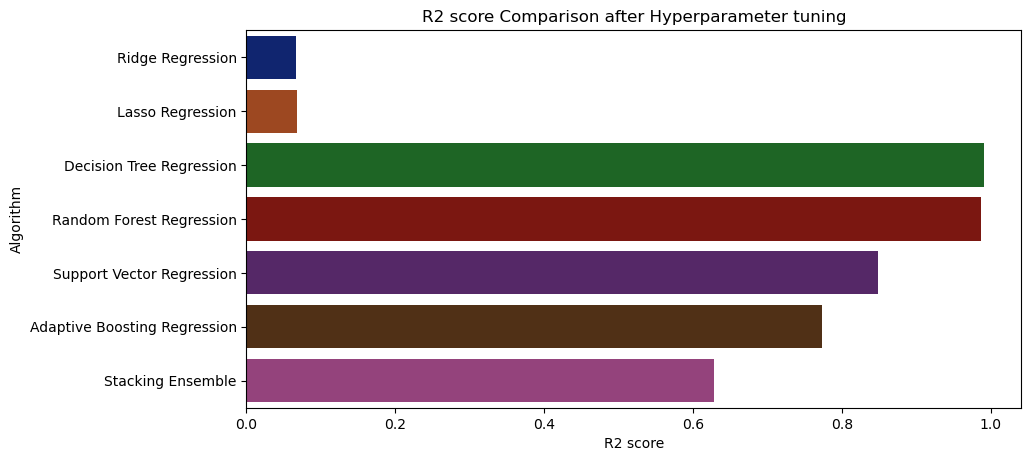

In [59]:
#comparing r2_score after hyperparameter tuning
plt.figure(figsize=[10,5],dpi = 100)
plt.title('R2 score Comparison after Hyperparameter tuning')
plt.xlabel('R2 score')
plt.ylabel('Algorithm')
sns.barplot(x = hp_R2_score,y =hp_reg_model,palette='dark')